# **Data description**

📋 **Features**  > 9 columns

1. Name : 게임의 이름

2. Platform : 게임이 지원되는 플랫폼의 이름

3. Year : 게임이 출시된 연도

4. Genre : 게임의 장르

5. Publisher : 게임을 제작한 회사

6. NA_Sales : 북미지역에서의 출고량

7. EU_Sales : 유럽지역에서의 출고량

8. JP_Sales : 일본지역에서의 출고량

9. Other_Sales : 기타지역에서의 출고량

** Sales feature 단위 : k = 1,000(천) / m = 1,000,000(백만)

# **데이터 전처리**

> **1) 데이터 준비 및 확인**





In [1]:
# 로컬 데이터 불러오기
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [2]:
# 라이브러리 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# csv파일 불러오기
df = pd.read_csv("vgames2.csv").iloc[:,1:]
df.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [4]:
# 데이터 타입 확인
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [5]:
# 장르 확인
df['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

In [6]:
# 플랫폼 확인
df['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
# 결측치 수 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [15]:
df.dropna(inplace=True)
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

> **2) 데이터 확인 후 전처리 실행**



- 년도 전처리

In [16]:
df['Year'].value_counts()

2009.0    1428
2008.0    1423
2010.0    1253
2007.0    1195
2011.0    1133
2006.0    1005
2005.0     934
2002.0     826
2003.0     774
2004.0     740
2012.0     652
2015.0     611
2014.0     580
2013.0     545
2001.0     480
1998.0     377
2000.0     348
2016.0     342
1999.0     336
1997.0     289
1996.0     262
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       8
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [17]:
year_1000 = (df['Year'] < 1000)
df['Year'][year_1000].value_counts()

Series([], Name: Year, dtype: int64)

In [18]:
year_1000 = (df['Year'] < 1000)
df['Year'][year_1000] = df['Year'][year_1000].apply(lambda x : x + 2000 if x < 21 else x + 1900)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
np.sort(df['Year'].unique())

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.])

- 각 나라별 출고량 전처리 <br>
 → 'k'와 'm' 제거 / million 단위로 통일 / float으로 변환 / Total_sales 피처 추가

In [20]:
def tofloat(n):
  try:
    float(n)
  except:
    if 'M' in n:
      n = n[:-1]
    elif 'K' in n:
      n = float(n[:-1])/1000
  return n

df['NA_Sales'] = df['NA_Sales'].apply(tofloat).astype(float)
df['EU_Sales'] = df['EU_Sales'].apply(tofloat).astype(float)
df['JP_Sales'] = df['JP_Sales'].apply(tofloat).astype(float)
df['Other_Sales'] = df['Other_Sales'].apply(tofloat).astype(float)

In [21]:
df['Total_Sales'] = df[df.columns[5:]].sum(axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


# **Q.1) 지역에 따라서 선호하는 게임 장르가 다를까?**

In [23]:
# 장르 확인 > 12개 장르
df['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [26]:
sales_col = df.columns[-5:]
sales_col

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'], dtype='object')

In [27]:
# 장르에 따라 groupby, 지역에 따른 장르별 판매량 합계
df_sales_genre_region = df.groupby(by='Genre').sum()[sales_col]
df_sales_genre_region

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,858.75,513.64,156.60,183.99,1712.98
Adventure,101.79,63.66,51.87,16.70,234.02
Fighting,220.35,99.90,87.14,36.15,443.54
Misc,394.73,208.15,104.18,72.64,779.70
Platform,445.38,200.63,130.53,51.45,827.99
Puzzle,121.58,50.47,56.24,12.44,240.73
Racing,354.70,235.02,56.32,76.51,722.55
Role-Playing,318.76,183.09,342.93,56.73,901.51
Shooter,574.48,310.23,38.18,101.86,1024.75


In [28]:
# 지역에 따른 장르별 판매량 비율 (%)
df_sales_genre_region_ratio = round((df_sales_genre_region / df_sales_genre_region.sum()) * 100, 2)
df_sales_genre_region_ratio

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,19.94,21.46,12.32,23.49,19.56
Adventure,2.36,2.66,4.08,2.13,2.67
Fighting,5.12,4.17,6.85,4.61,5.07
Misc,9.16,8.70,8.19,9.27,8.91
Platform,10.34,8.38,10.27,6.57,9.46
Puzzle,2.82,2.11,4.42,1.59,2.75
Racing,8.24,9.82,4.43,9.77,8.25
Role-Playing,7.40,7.65,26.97,7.24,10.30
Shooter,13.34,12.96,3.00,13.00,11.70


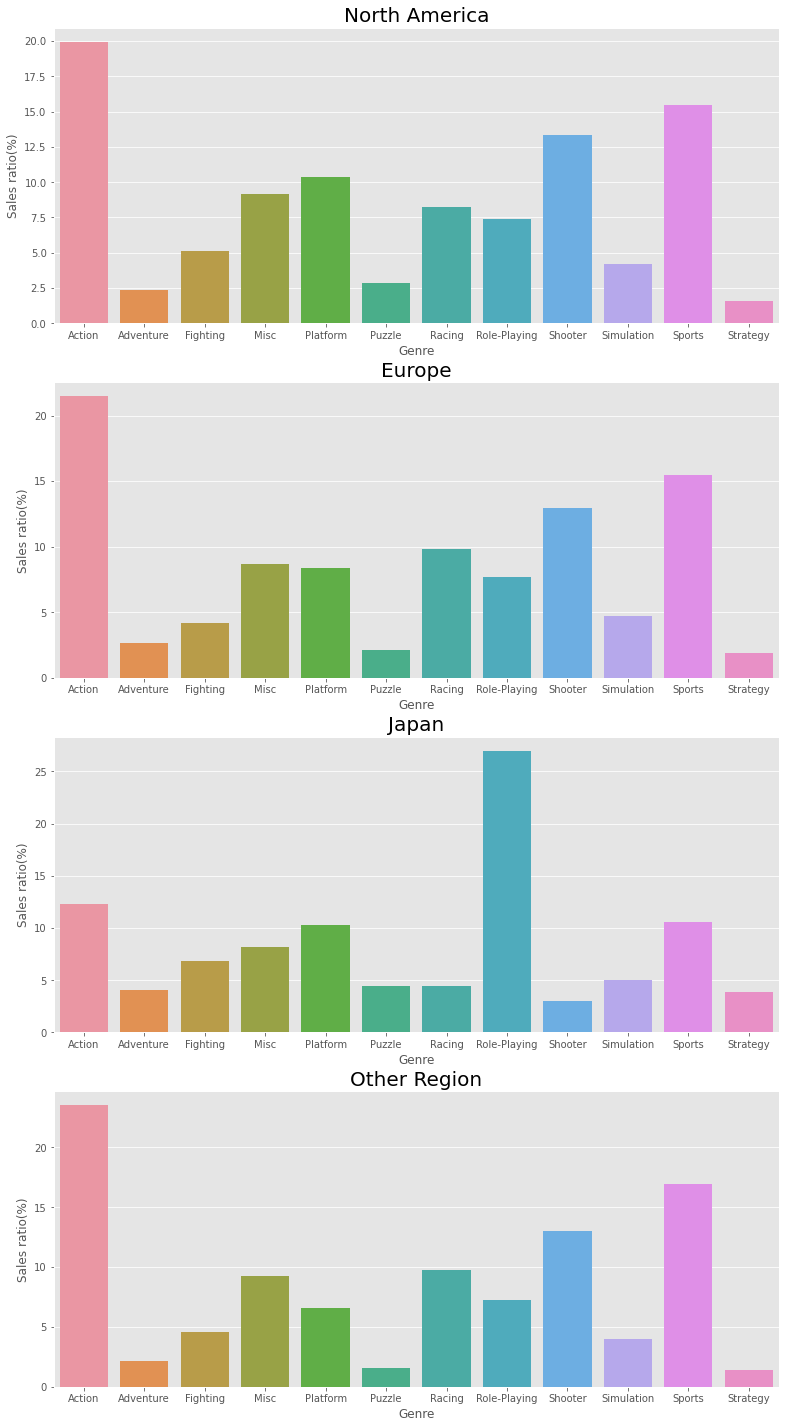

In [44]:
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# 국가에 따른 장르별 판매량
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(13,25), nrows=4)  # plot 4개 생성

sns.barplot(x = df_sales_genre_region_ratio.index,
            y = df_sales_genre_region_ratio['NA_Sales'], ax = ax1)
sns.barplot(x = df_sales_genre_region_ratio.index,
            y = df_sales_genre_region_ratio['EU_Sales'], ax = ax2)
sns.barplot(x = df_sales_genre_region_ratio.index,
            y = df_sales_genre_region_ratio['JP_Sales'], ax = ax3)
sns.barplot(x = df_sales_genre_region_ratio.index,
            y = df_sales_genre_region_ratio['Other_Sales'], ax = ax4)

ax1.set_title('North America', fontsize=20)
ax1.set_ylabel('Sales ratio(%)')
ax2.set_title('Europe', fontsize=20)
ax2.set_ylabel('Sales ratio(%)')
ax3.set_title('Japan', fontsize=20)
ax3.set_ylabel('Sales ratio(%)')
ax4.set_title('Other Region', fontsize=20)
ax4.set_ylabel('Sales ratio(%)')

plt.show()

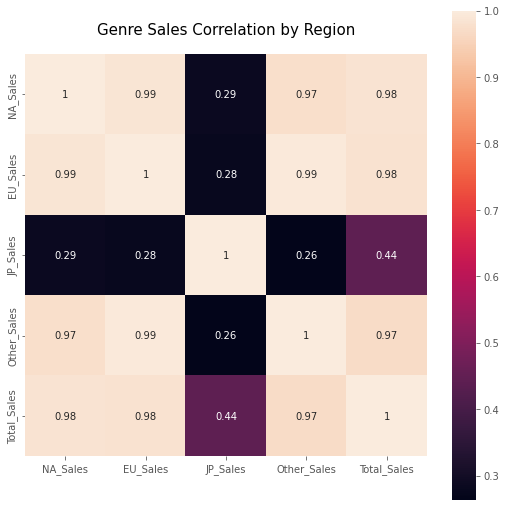

In [47]:
# 지역간의 판매 장르 상관관계
plt.figure(figsize=(9,9))
sns.heatmap(df_sales_genre_region_ratio.corr(), square=True, annot=True)
plt.title('Genre Sales Correlation by Region', fontsize=15, pad=20)
plt.show()

In [50]:
from scipy import stats  # scipy패키지의 stats 함수 사용

# 일본을 제외한 세 지역(미국, 유럽, 그 외)의 분포가 같은지 확인
pval_of_genre_region = stats.chi2_contingency(df_sales_genre_region_ratio.drop(columns=['JP_Sales']))[1]
pval_of_genre_region

0.9999999999766226

귀무가설 : 일본을 제외한 미국, 유럽, 그 외 지역의 장르별 판매 분포는 같다. <br>
일본 제외한 세 지역의 two-way chi-squared test(이원 카이제곱검정)을 한 결과,<br>
p-value가 0.05보다 큰 0.99이기 때문에 귀무가설을 기각할 수 없다.<br>
**즉, 일본을 제외한 세 지역의 장르별 판매량 분포는 같다.**

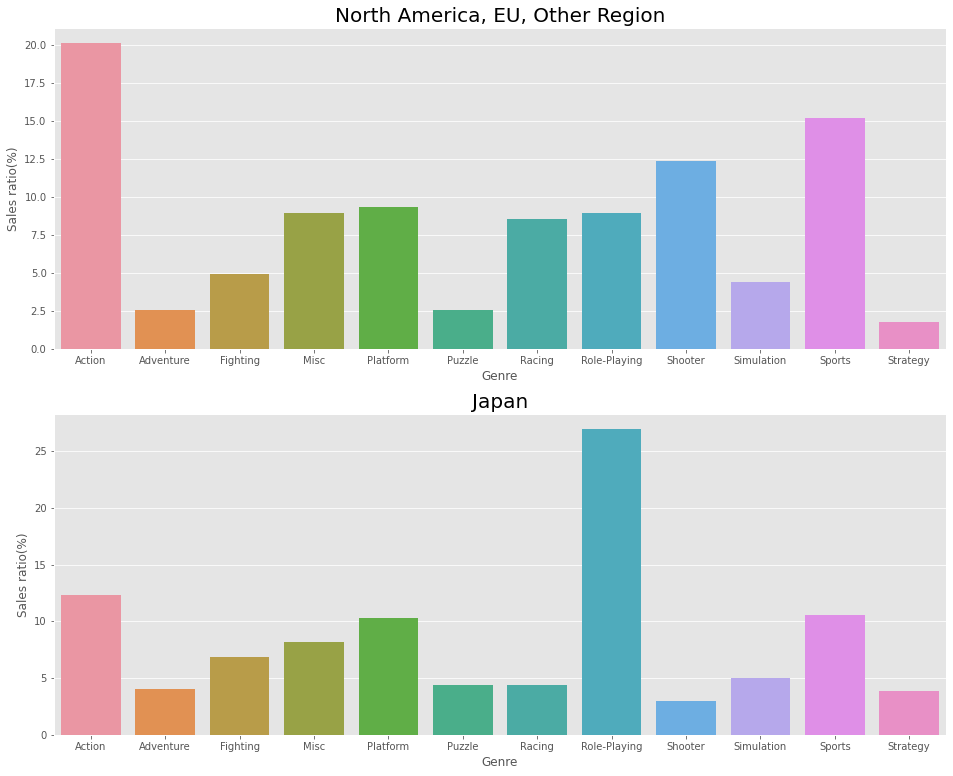

In [52]:
# "일본 / 그 외 국가 그룹"의 장르별 판매량
df_sales_genre_ratio_except_jp = round(df_sales_genre_region.drop(columns=['JP_Sales']).sum(axis=1) / df_sales_genre_region.drop(columns=['JP_Sales']).sum(axis=1).sum() * 100, 2)
df_sales_genre_ratio_except_jp.name = 'Except_JP'

fig, (ax1, ax2) = plt.subplots(figsize=(16,13), nrows=2)
sns.barplot(x = df_sales_genre_ratio_except_jp.index,
            y = df_sales_genre_ratio_except_jp, ax = ax1)
sns.barplot(x = df_sales_genre_region_ratio.index,
            y = df_sales_genre_region_ratio['JP_Sales'], ax = ax2)

ax1.set_title('North America, EU, Other Region', fontsize=20)
ax1.set_ylabel('Sales ratio(%)')
ax2.set_title('Japan', fontsize=20)
ax2.set_ylabel('Sales ratio(%)')

plt.show()

일본과 그 외 국가의 장르별 판매량은 확연히 다르다. <br>
일본 지역의 경우 Role-Playing장르의 판매가 높게 나타난다.

# **Q.2) 연도별 게임의 트렌드가 있을까?**

(array([ 107.,   65.,   89.,  443., 1264., 2428., 3874., 5237., 2388.,
         346.]),
 array([1980., 1984., 1988., 1992., 1996., 2000., 2004., 2008., 2012.,
        2016., 2020.]),
 <a list of 10 Patch objects>)

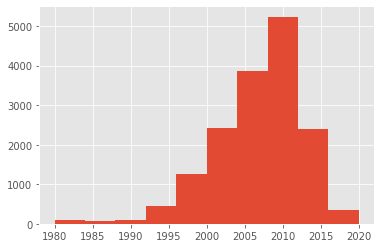

In [53]:
plt.hist(df['Year'])

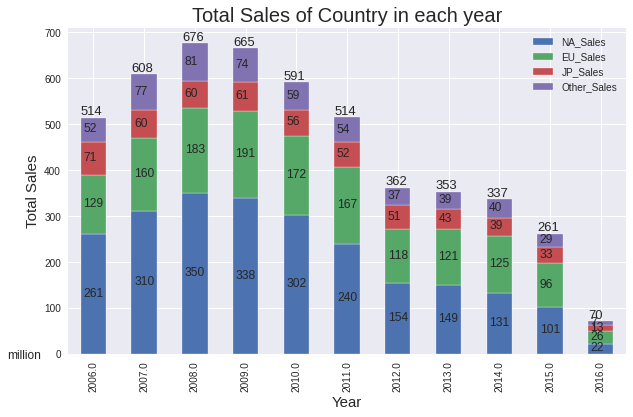

In [88]:
# 시간에 따른 지역별 매출 변화

from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

df_10 = df[(df.Year>2005) & (df.Year<2017)]
df_10

# 연도 x 장르 데이터 생성
year_country = df_10.groupby('Year').sum()
year_country = year_country.iloc[:,:-1]
yc_graph = year_country

yc_graph.plot.bar(stacked=True,figsize=(10,6))
plt.title('Total Sales of Country in each year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total Sales',fontsize=15)

for i in range(len(yc_graph.index)):
  plt.text(i-0.25,yc_graph.iloc[i,:].sum()+6,int(yc_graph.iloc[i,:].sum()), size = 13)

plt.text(-1.7,-10,s='million')

yc_ind = yc_graph.index
x = range(len(yc_ind))
yc_col = yc_graph.columns

for i in range(len(yc_ind)):
  sum = 0
  value = 0
  for j in range(len(yc_col)):
    sum += yc_graph.iloc[i,j]
    value =int(yc_graph.iloc[i,j])
    plt.text(x[i]-0.2,sum - (yc_graph.iloc[i,j]/2)-5,value,size=12)

plt.show();

# **Q.3) 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

In [56]:
#전체 출고량 Top 15개
df_Total_Top_15 = df.sort_values('Total_Sales', ascending=False).head(15)
df_Total_Top_15

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1203,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10488,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


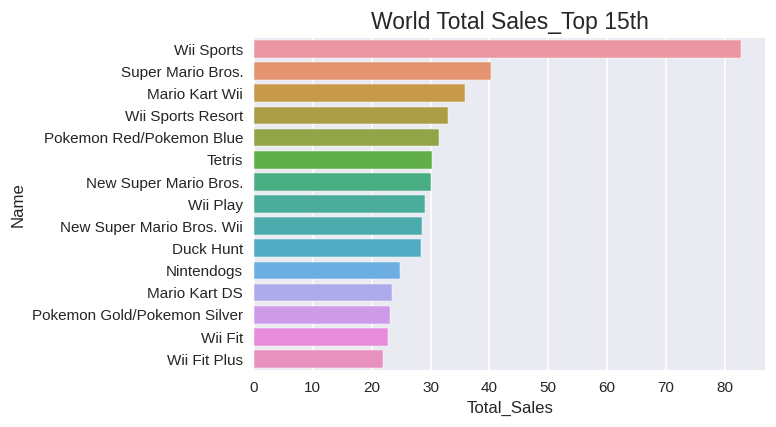

In [59]:
plt.figure(figsize=(6,4), dpi=110)
plt.title("World Total Sales_Top 15th", fontsize=15)
sns.barplot(data=df_Total_Top_15, x='Total_Sales',y='Name')
plt.show()

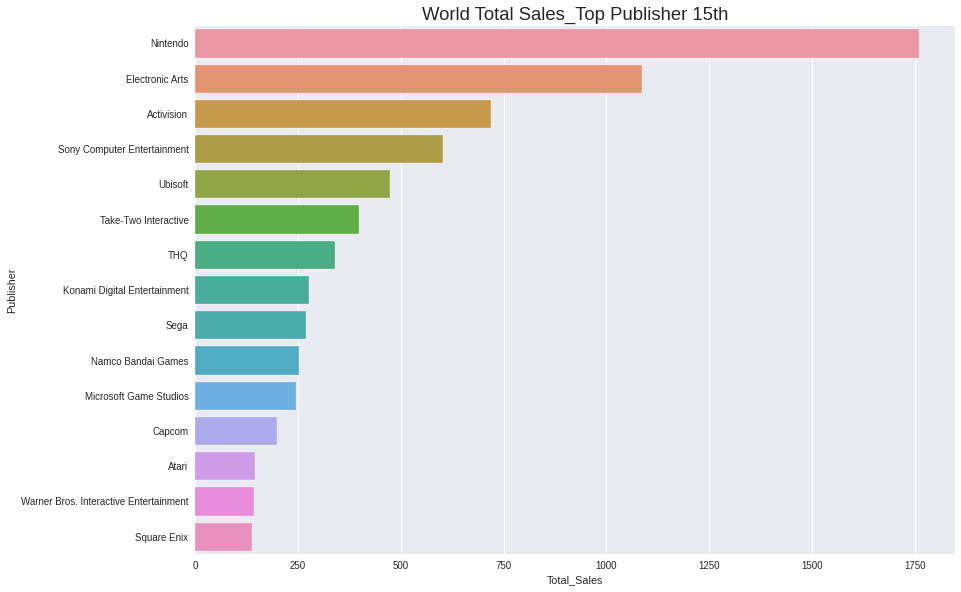

In [73]:
# 통합년도 세계 매출 Top15 제작사
df_Total_Year_Pub15 = df.groupby(['Publisher']).agg('sum').sort_values('Total_Sales', ascending=False).head(15)
plt.figure(figsize=(14,10), dpi=70)
plt.title("World Total Sales_Top Publisher 15th", fontsize=19)
sns.barplot(data=df_Total_Year_Pub15.reset_index(), x='Total_Sales', y='Publisher')

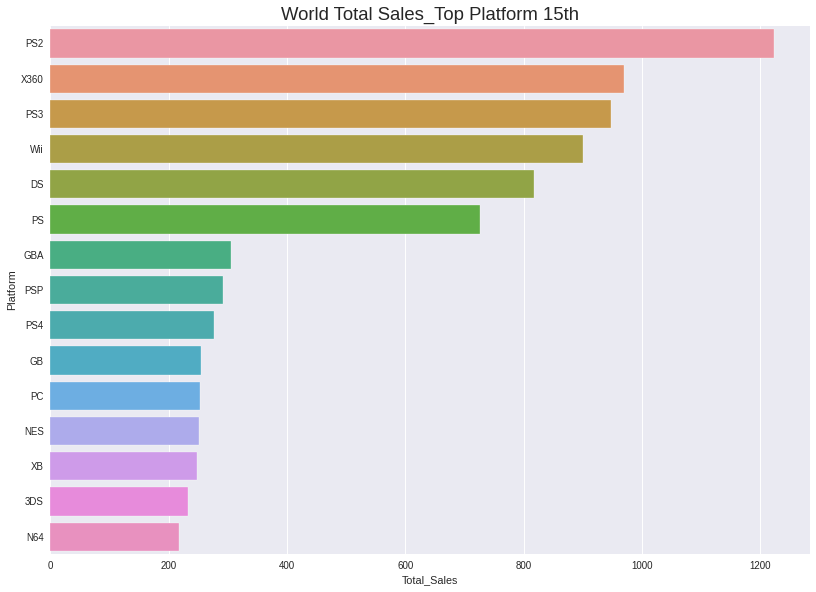

In [76]:
# 통합년도 세계 매출 Top 15 Platform

df_Total_Year_Pub15 = df.groupby(['Platform']).agg('sum').sort_values('Total_Sales', ascending=False).head(15)
plt.figure(figsize=(14,10), dpi=70)
plt.title("World Total Sales_Top Platform 15th", fontsize=19)
sns.barplot(data=df_Total_Year_Pub15.reset_index(), x='Total_Sales', y='Platform')

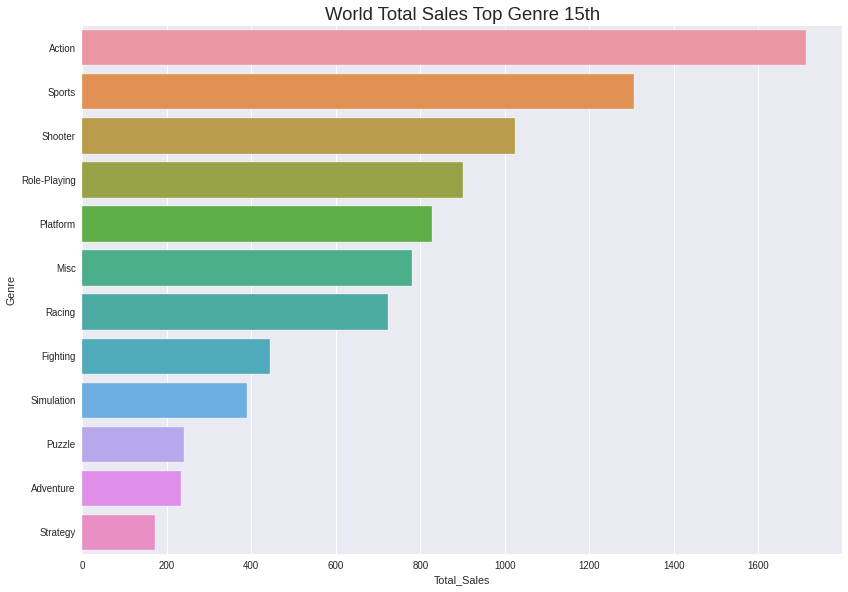

In [78]:
df_Total_Year_Pub15 = df.groupby(['Genre']).agg('sum').sort_values('Total_Sales', ascending=False).head(15)
plt.figure(figsize=(14,10), dpi=70)
plt.title("World Total Sales Top Genre 15th", fontsize=19)
sns.barplot(data=df_Total_Year_Pub15.reset_index(), x='Total_Sales', y='Genre')

통합년도 세계 매출 / Publisher / PlatformTop의 Top 15개를 보았을 때, <br>
1위인 Wii Sports는 2위보다 2배 가까운 차이가 나는 것을 알 수 있다. <br>
제작사로는 Nintendo 제작사가 압도적인 1위를 하며, Electronic Arts, Activision이 뒤를 따른다. <br>
플랫폼에서는 PS2가 1위를 하고 X360, PS3, Wii 등이 뒤를 따르고 있다. <br>
장르에서는 Action이 1위를 하고 스포츠, 슈터, 롤플레잉이 뒤를 따른다.